In [118]:
import numpy as np
import cv2 
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from numpy.fft import fft, fftfreq, ifft

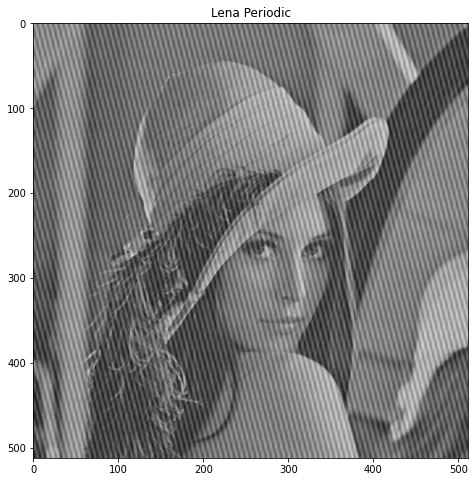

In [119]:
#read img
img = cv2.imread('lena_priodic.bmp')

#show img
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.imshow(img)
ax.set_title('Lena Periodic')
plt.show()

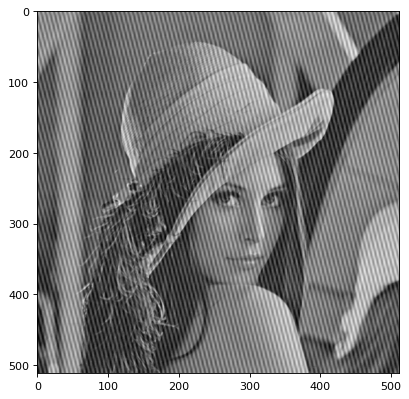

In [120]:
#convert img into graysacle
img_grey = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_grey, cmap='gray');

In [121]:
#show shape
print('img shape = ', img.shape)
print('img_grey shape = ', img_grey.shape)

img shape =  (512, 512, 3)
img_grey shape =  (512, 512)


In [122]:
#do Fourier Transform
img_fft = np.fft.fftshift(np.fft.fft2(img_grey))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


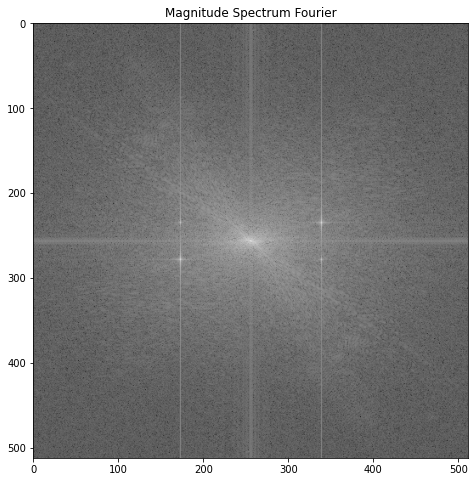

In [123]:
#show magnitude spectrum Fourier
plt.figure(num=None, figsize=(16, 8))
plt.title(img_fft, text='Magnitude Spectrum Fourier')
plt.imshow(np.log(abs(img_fft+1)), cmap='gray')

In [124]:
#Noted: noise frequency
#column 1: 170-180, row: 230-240, 272-281
#column 2: 250-269
#column 3: 335-345, row: 230-240, 275-285

In [125]:
#remove noise frequency, set them = 0 (manually)
#column 1:
for j in range(170, 180):
  #row 1
  for i in range(230, 240):
    img_fft[i, j] = 0
  #row 2
  for i in range(272, 282):
    img_fft[i, j] = 0

#column 3:
for j in range(335, 345):
  #row 1
  for i in range(230, 240):
    img_fft[i, j] = 0
  #row 2
  for i in range(275, 285):
    img_fft[i, j] = 0

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


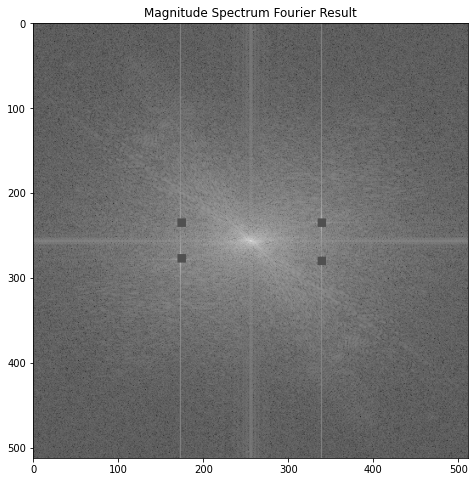

In [126]:
#show magnitude spectrum Fourier again (to see the difference)
plt.figure(num=None, figsize=(16, 8))
plt.title(img_fft, text='Magnitude Spectrum Fourier Result')
plt.imshow(np.log(abs(img_fft+1)), cmap='gray')

In [127]:
#invers the img_fft
img_ifft = np.fft.ifft2(np.fft.ifftshift(img_fft)).real

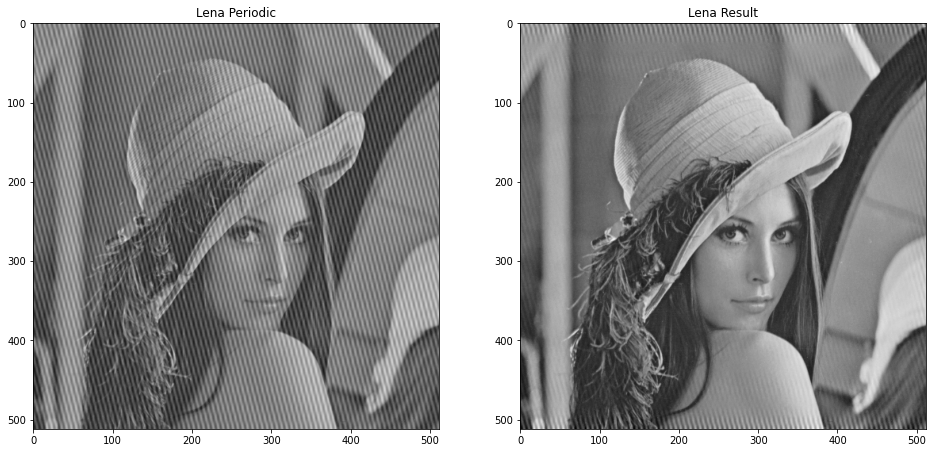

In [128]:
#show the result img
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img)
ax[0].set_title('Lena Periodic')
ax[1].imshow(img_ifft, cmap='gray')
ax[1].set_title('Lena Result')
plt.show()